In [4]:
import numpy as np

q = np.array([0.1, 0.7, 0.2])

def model_dist(theta: np.ndarray)   -> np.ndarray:
    return np.stack([theta / 2, 1 - theta, theta / 2], axis=-1)

def kl(p: np.ndarray, q: np.ndarray) -> float:
    """
    Kullback-Leibler divergence D_KL(P || Q)
    """
    # Ensure p and q are valid probability distributions
    p = p / np.sum(p, axis=-1, keepdims=True)  # Normalize p
    q = q / np.sum(q, axis=-1, keepdims=True)  # Normalize q
    
    # Avoid log(0) by using np.where
    return np.sum(np.where(p > 0, p * np.log(p / q), 0), axis=-1)
    


/tmp/ipykernel_138302/3607921957.py:17: RuntimeWarning: divide by zero encountered in divide
  return np.sum(np.where(p > 0, p * np.log(p / q), 0), axis=-1)


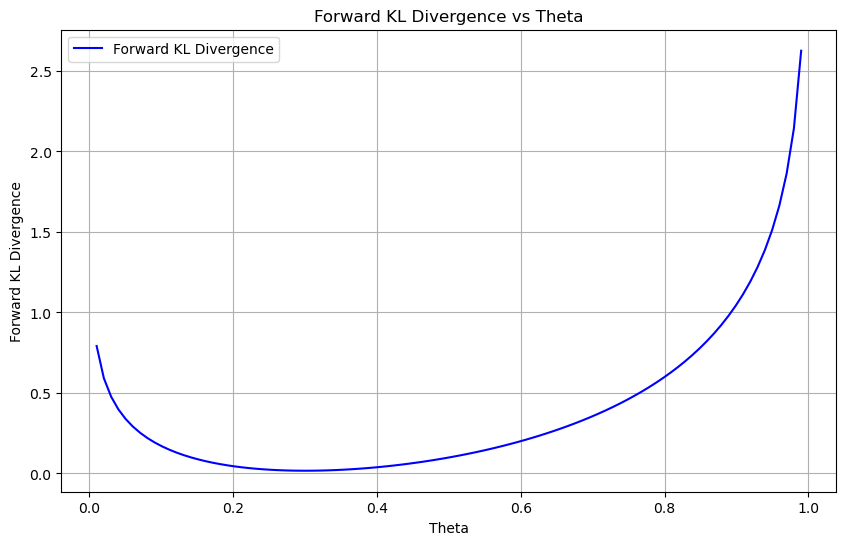

Minimum Forward KL Divergence occurs at theta = 0.3030 with value 0.0170


In [ ]:
# Plot forward kl over a range of theta values from 0 to 1
import matplotlib.pyplot as plt
theta_values = np.linspace(0, 1, 100)
model_dists = model_dist(theta_values)
forward_kl_values = kl(q[None], model_dists)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, forward_kl_values, label='Forward KL Divergence', color='blue')
plt.title('Forward KL Divergence vs Theta')
plt.xlabel('Theta')
plt.ylabel('Forward KL Divergence')
plt.grid(True)
plt.legend()
plt.show()

# Minimum achieviing theta
min_theta_index = np.argmin(forward_kl_values)
min_theta = theta_values[min_theta_index]
min_forward_kl = forward_kl_values[min_theta_index]
print(f"Minimum Forward KL Divergence occurs at theta = {min_theta:.4f} with value {min_forward_kl:.4f}")
print(f"Distribution is {model_dist(np.array([min_theta]))[0]}")


/tmp/ipykernel_138302/3607921957.py:17: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p > 0, p * np.log(p / q), 0), axis=-1)
/tmp/ipykernel_138302/3607921957.py:17: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p > 0, p * np.log(p / q), 0), axis=-1)


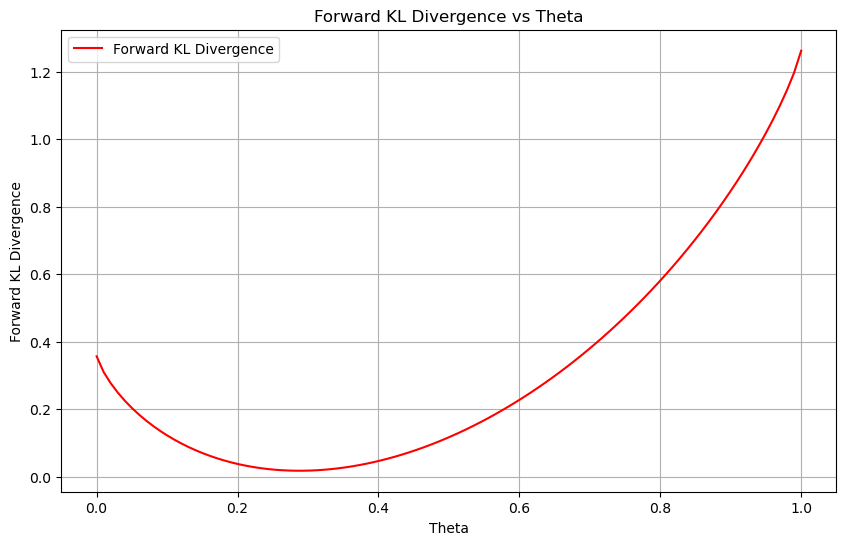

Minimum Reverse KL Divergence occurs at theta = 0.2828 with value 0.0174


In [ ]:
# Now do reverse KL
import matplotlib.pyplot as plt
theta_values = np.linspace(0, 1, 100)
model_dists = model_dist(theta_values)
reverse_kl_values = kl(model_dists, q[None])

plt.figure(figsize=(10, 6))
plt.plot(theta_values, reverse_kl_values, label='Forward KL Divergence', color='red')
plt.title('Forward KL Divergence vs Theta')
plt.xlabel('Theta')
plt.ylabel('Forward KL Divergence')
plt.grid(True)
plt.legend()
plt.show()

# Minimum achieviing theta
min_theta_index = np.argmin(reverse_kl_values)
min_theta = theta_values[min_theta_index]
min_forward_kl = reverse_kl_values[min_theta_index]
print(f"Minimum Reverse KL Divergence occurs at theta = {min_theta:.4f} with value {min_forward_kl:.4f}")
print(f"Distribution is {model_dist(np.array([min_theta]))[0]}")
